DWM-09P: Take BreastCancer.csv file. (1) (a) Find which attributes should be trivially excluded
for classification. (b) Divide the data into Training Set (70%) and Test Set (30%) using Stratified
Sampling method. (2) Using Support Vector Machine (SVM) to train the model using the Training
Set. (3) Write the Model and use the model for testing it using Test Set. Determine the accuracy of
the Classifier.

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

In [4]:
# Importing dataset
data = pd.read_csv('BreastCancer.csv')
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [5]:
# Display shape of dataset
print("Shape of dataset:", data.shape)

Shape of dataset: (699, 11)


In [6]:
# Display columns
print("Columns of dataset:", data.columns)


Columns of dataset: Index(['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')


In [7]:
data["Class"].value_counts()

Class
benign       458
malignant    241
Name: count, dtype: int64

In [8]:
# Check for null values
print("Null values in dataset:")
print(data.isnull().sum())


Null values in dataset:
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64


In [9]:
benign_data = data[data['Class'] == 'benign']

In [10]:
# Check for null values in all columns
benign_data.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        14
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [11]:
# Dropping rows with missing values
# benign_data = benign_data.dropna()  # Optionally drop rows with missing values

# Replace missing values in the 'Bare.nuclei' column with the mean
benign_data['Bare.nuclei'].fillna(benign_data['Bare.nuclei'].mean(), inplace=True)

benign_data  # Display the benign_data DataFrame


C:\Users\DELL\AppData\Local\Temp\ipykernel_15220\979579339.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benign_data['Bare.nuclei'].fillna(benign_data['Bare.nuclei'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15220\979579339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign_data['Bare.nuclei'].fillna(benign

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
690,654546,1,1,1,3,2,1.0,1,1,1,benign
692,714039,3,1,1,1,2,1.0,1,1,1,benign
693,763235,3,1,1,1,2,1.0,2,1,2,benign
694,776715,3,1,1,1,3,2.0,1,1,1,benign


In [12]:
malignant_data = data[data['Class'] == 'malignant']  # Extract rows where the class is 'malignant' and assign them to the variable malignant_data


In [13]:
# Check for null values in all columns
malignant_data.isnull().sum()  # Count the null values in each column of malignant_data DataFrame

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        2
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [14]:
# Dropping rows with missing values
# malignant_data = benign_data.dropna()  # Optionally drop rows with missing values

# Replace missing values in the 'Bare.nuclei' column with the mean
malignant_data['Bare.nuclei'].fillna(malignant_data['Bare.nuclei'].mean(), inplace=True)

malignant_data  # Display the malignant_data DataFrame


C:\Users\DELL\AppData\Local\Temp\ipykernel_15220\3230769691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  malignant_data['Bare.nuclei'].fillna(malignant_data['Bare.nuclei'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15220\3230769691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignant_data['Bare.nuclei'].fi

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
5,1017122,8,10,10,8,7,10.0,9,7,1,malignant
12,1041801,5,3,3,3,2,3.0,4,4,1,malignant
14,1044572,8,7,5,10,7,9.0,5,5,4,malignant
15,1047630,7,4,6,4,6,1.0,4,3,1,malignant
18,1050670,10,7,7,6,4,10.0,4,1,2,malignant
...,...,...,...,...,...,...,...,...,...,...,...
681,1371026,5,10,10,10,4,10.0,5,6,3,malignant
691,695091,5,10,10,5,4,5.0,4,4,1,malignant
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [15]:
data = pd.concat([benign_data, malignant_data], axis=0)  # Concatenate the benign_data and malignant_data DataFrames along the rows (axis=0)


In [16]:
# Checking for null values again to confirm they have been removed
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [17]:
# There is no need of encoding diagnosis column as it is the dependent variable(y)
# But we encode the diagnosis column to find correlation and make a heatmap
le = LabelEncoder()
data['Class_enc'] = le.fit_transform(data['Class'])

In [18]:
# Deleting the diagnosis column as we encoded it in diagnosis_enc
data = data.drop('Class', axis=1)
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_enc
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
681,1371026,5,10,10,10,4,10.0,5,6,3,1
691,695091,5,10,10,5,4,5.0,4,4,1,1
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


<Axes: >

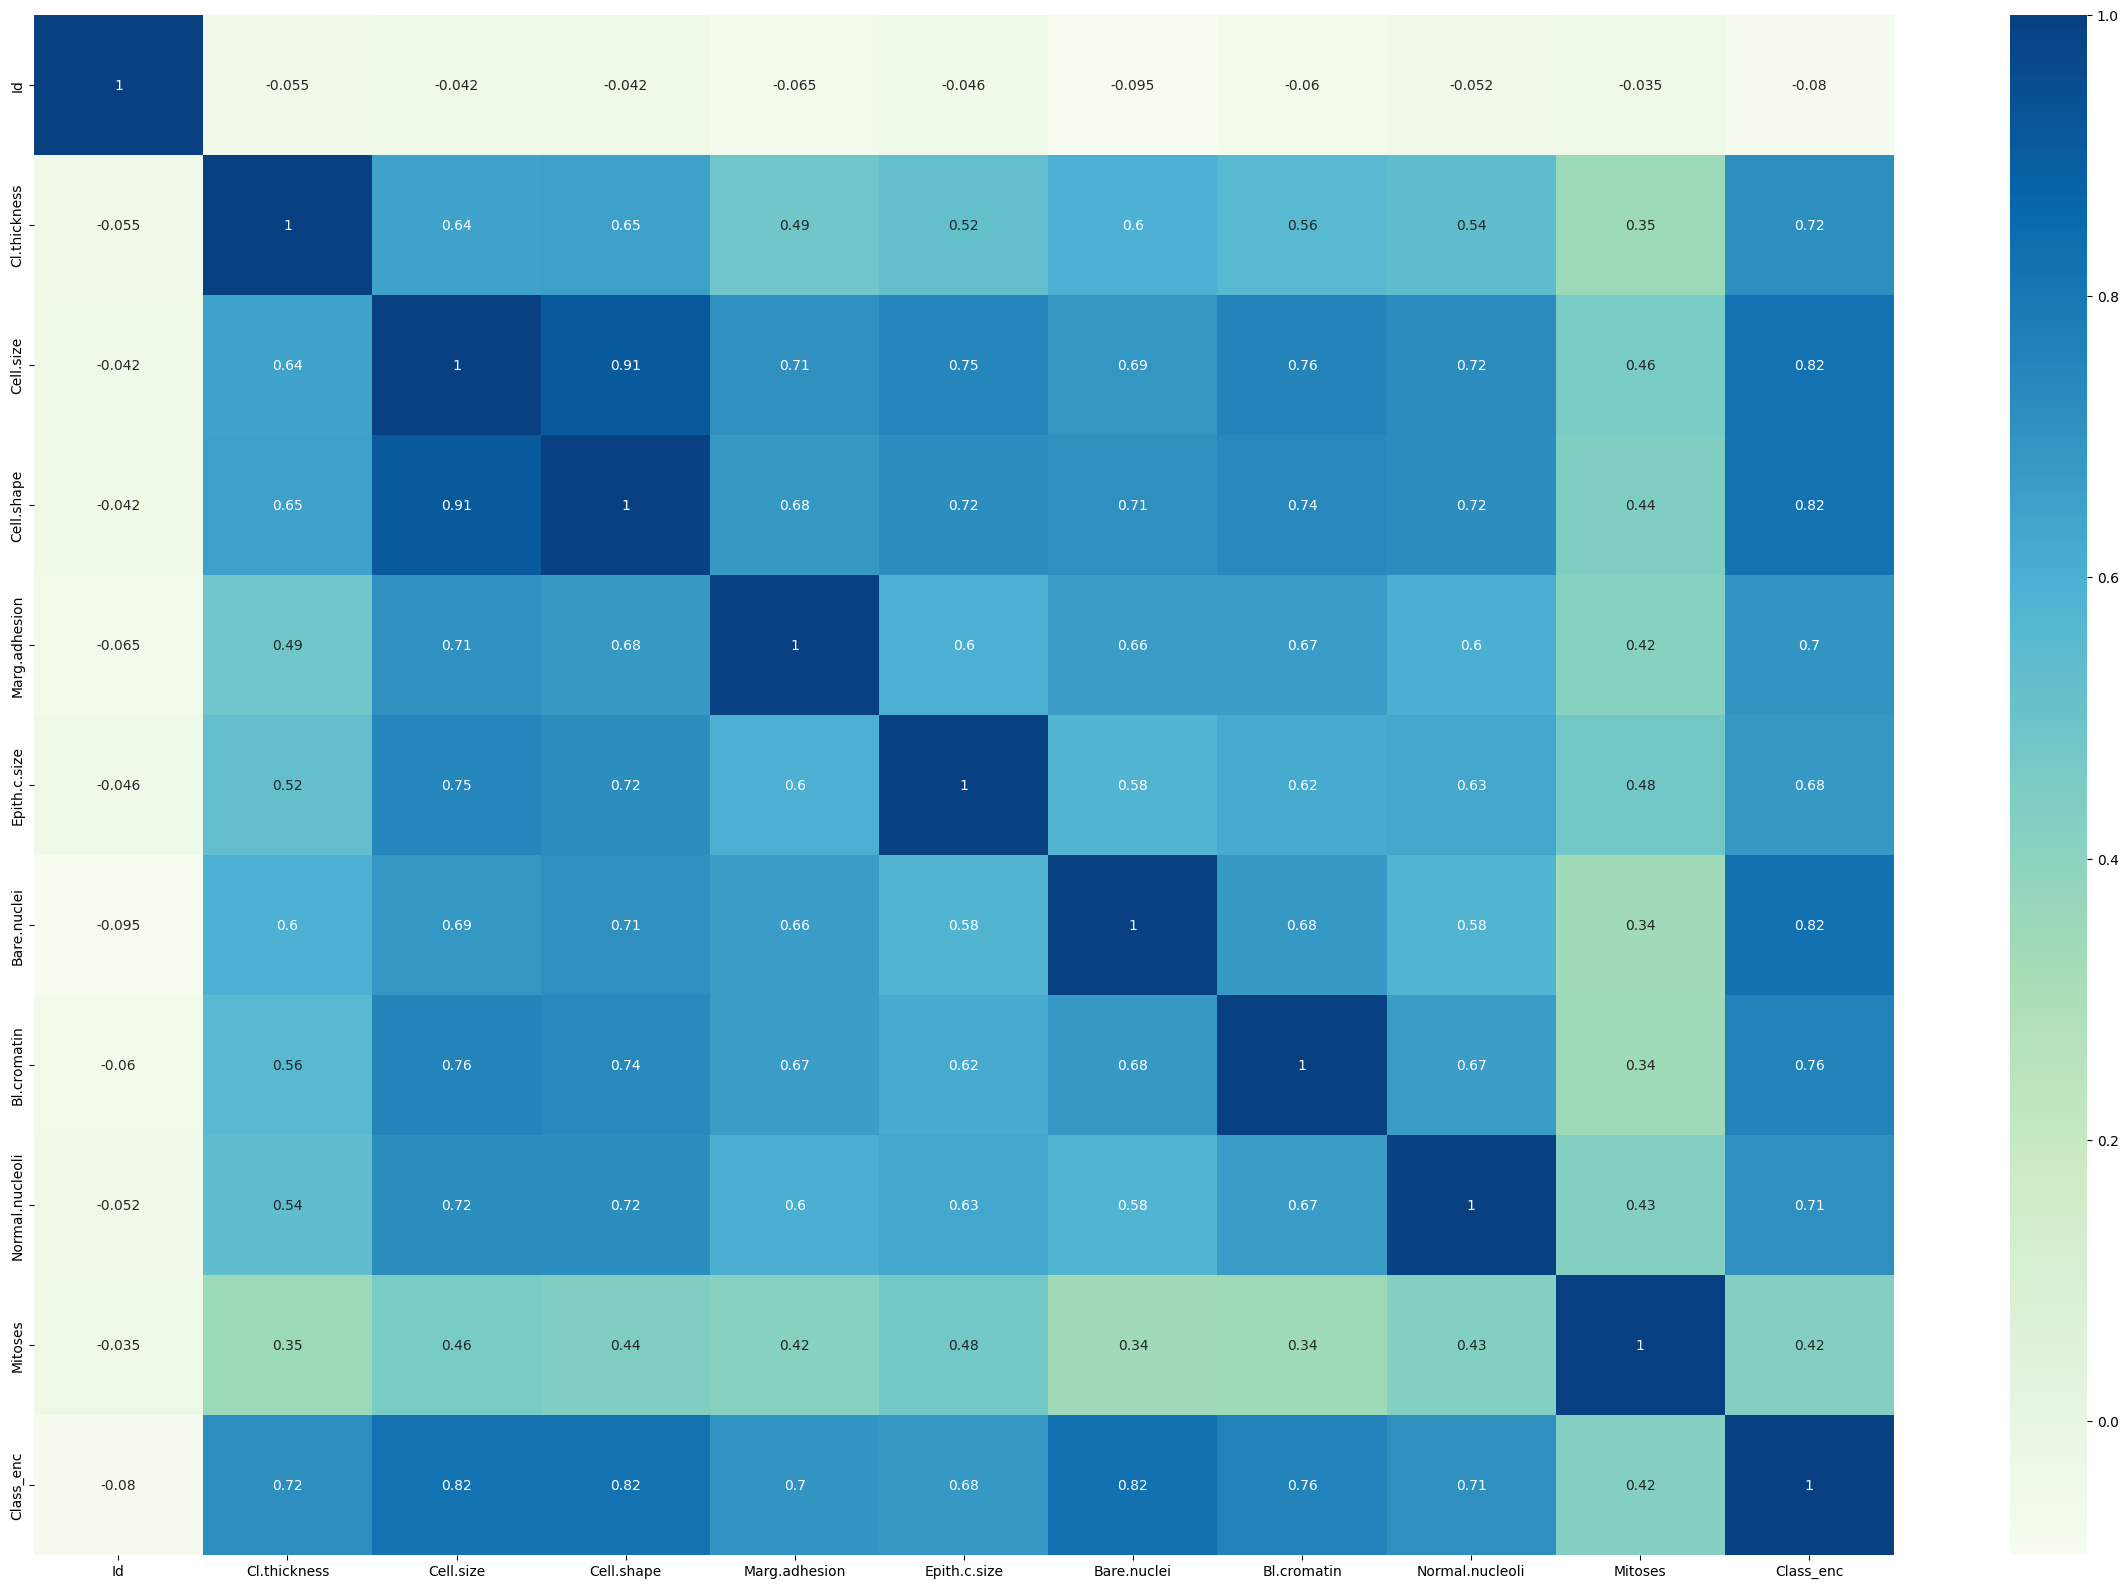

In [19]:
# Plotting a heatmap
x = data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(x,annot=True,cmap='GnBu')

In [20]:
# Finding the correlation of all the columns with the diagnosis column
correlations = data.corr()['Class_enc'].abs().sort_values()

# Print the correlations
print(correlations)

Id                 0.080226
Mitoses            0.423170
Epith.c.size       0.682785
Marg.adhesion      0.696800
Normal.nucleoli    0.712244
Cl.thickness       0.716001
Bl.cromatin        0.756616
Cell.size          0.817904
Cell.shape         0.818934
Bare.nuclei        0.824843
Class_enc          1.000000
Name: Class_enc, dtype: float64


In [21]:
low_correlation_cols = correlations[correlations < 0.4].index.tolist()
low_correlation_cols

['Id']

In [22]:
data1 = data.drop(low_correlation_cols,axis=1)

In [23]:
# Defining the independent variable (X) and dependent variable (y)
X = data1.drop(["Class_enc"], axis = 1)
y = data1["Class_enc"]

# Splitting the dataset into 70% training and 30% testing data with use of stratified sampling method
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [24]:
print("Number of samples in training set (X_train):", X_train.shape[0])
print("Number of samples in testing set (X_test):", X_test.shape[0])
print("Number of samples in training set (y_train):", y_train.shape[0])
print("Number of samples in testing set (y_test):", y_test.shape[0])


Number of samples in training set (X_train): 489
Number of samples in testing set (X_test): 210
Number of samples in training set (y_train): 489
Number of samples in testing set (y_test): 210


In [25]:
# Initialize the SVM model
svm_classifier = SVC(kernel='linear')
# Fit the training data to the SVM model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [26]:
# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)


# Evaluate the SVM model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of the SVM Classifier: {accuracy_svm}')

Accuracy of the SVM Classifier: 0.9714285714285714


In [27]:
# Making a Confusion Matrix to check the FP and FN 
cm_lr = confusion_matrix(y_test, y_pred_svm)
cm_lr

array([[136,   2],
       [  4,  68]], dtype=int64)

In [28]:
# Bagging using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy: 0.971


In [31]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[136,   2],
       [  4,  68]], dtype=int64)